In [21]:
#Importing the libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import time
from ipywidgets import widgets
from IPython.display import display

In [22]:
data = pd.read_csv('twitter_data.csv')
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S')
camp1 = data[data['campaign_id']==1]
camp2 = data[data['campaign_id']==2]

In [23]:
camp1.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid
362,2018-04-23 08:57:08.925000,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
371,2018-04-23 08:58:28.159720,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
376,2018-04-23 08:59:18.955240,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
377,2018-04-23 08:59:23.448840,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
378,2018-04-23 08:59:32.645960,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5


In [24]:
camp2.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid
14930,2018-04-23 10:52:40.949,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15128,2018-04-23 10:53:29.333,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15338,2018-04-23 10:54:20.200,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15393,2018-04-23 10:54:34.112,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,True,1.15
15458,2018-04-23 10:54:52.198,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15


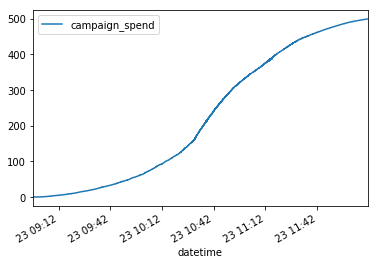

In [25]:
camp1.plot(x='datetime',y='campaign_spend')

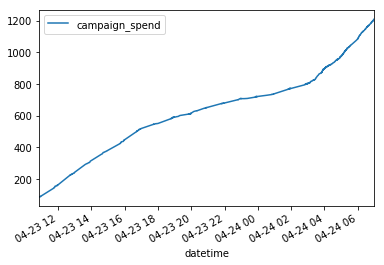

In [26]:
camp2.plot(x='datetime',y='campaign_spend')

In [27]:
camp1seen = camp1[camp1['seen_by_user']==True]
camp2seen = camp2[camp2['seen_by_user']==True]
camp1charged = camp1[camp1['charged']>0.0]
camp2charged = camp2[camp2['charged']>0.0]

In [28]:
100*len(camp1charged.index)/len(camp1seen.index)

3.8461538461538463

In [29]:
100*len(camp2charged.index)/len(camp2seen.index)

0.6060606060606061

In [30]:
camp1.iloc[0][['matched_targeting','bid']]

matched_targeting    GEO
bid                  7.5
Name: 362, dtype: object

In [31]:
camp2.iloc[0][['matched_targeting','bid']]

matched_targeting    ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']
bid                                                         1.15
Name: 14930, dtype: object

In [32]:
appinstall = data[data['objective']=='APP_INSTALLS']
vidview    = data[data['objective']=='VIDEO_VIEWS']
webclick   = data[data['objective']=='WEBSITE_CLICKS']

In [33]:
appinseen = appinstall[appinstall['seen_by_user']==True]
vidviewseen = vidview[vidview['seen_by_user']==True]
webclickseen = webclick[webclick['seen_by_user']==True]
appincharged = appinseen[appinseen['charged']>0.0]
vidviewcharged = vidviewseen[vidviewseen['charged']>0.0]

In [34]:
100*len(appincharged.index)/len(appinseen.index)

0.7371007371007371

In [35]:
100*len(vidviewcharged.index)/len(vidviewseen.index)

32.93436293436294

In [36]:
appinbid = appinstall[['objective','bid','campaign_budget']]
appinbid.groupby('objective').agg('mean')

,bid,campaign_budget
objective,,
APP_INSTALLS,1.213203,1095.790207


In [37]:
vidviewbid = vidview[['objective','bid','campaign_budget']]
vidviewbid.groupby('objective').agg('mean')

,bid,campaign_budget
objective,,
VIDEO_VIEWS,0.437544,759.117536


In [38]:
100*len(appinseen.index)/len(appinstall.index)

5.261797026502909

In [39]:
100*len(vidviewseen.index)/len(vidview.index)

21.245180871134444

In [40]:
100*len(webclickseen.index)/len(webclick.index)

12.881630250864415